# **Exploratory Data Analysis (EDA)**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
data = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv')

In [4]:
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
data.shape

(246022, 40)

In [7]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [8]:
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [9]:
for col in data.columns:
    print(f"\nFitur: {col}")
    print(data[col].unique())


Fitur: State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Fitur: Sex
['Female' 'Male']

Fitur: GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Fitur: PhysicalHealthDays
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.]

Fitur: MentalHealthDays
[ 0. 15.  4. 25.  5. 30. 27.  3.  2.  1. 10. 20. 21.  6.  7.  8.

In [10]:
for col in data.columns:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts())
    print("-" * 30)

Value counts for column 'State':
State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Missouri                 4195
New Jersey               3967
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
A

In [11]:
print(data.duplicated().sum())
data = data.drop_duplicates()

9


HighRiskLastYear
No     235437
Yes     10576
Name: count, dtype: int64


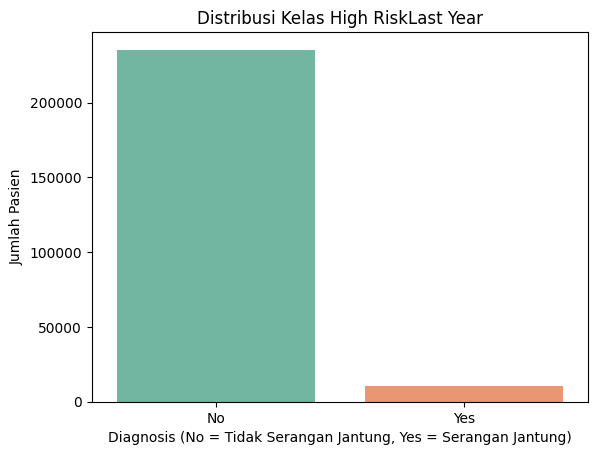

In [12]:
print(data['HighRiskLastYear'].value_counts())

sns.countplot(x='HighRiskLastYear', data=data, palette='Set2')
plt.title('Distribusi Kelas High RiskLast Year')
plt.xlabel('Diagnosis (No = Tidak Serangan Jantung, Yes = Serangan Jantung)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [13]:
numerik = ['PhysicalHealthDays',
           'MentalHealthDays',
           'SleepHours',
           'HeightInMeters',
           'WeightInKilograms',
           'BMI']

kategorikal = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos'
]

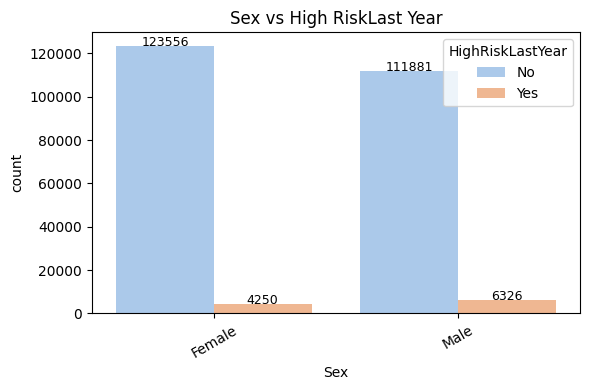

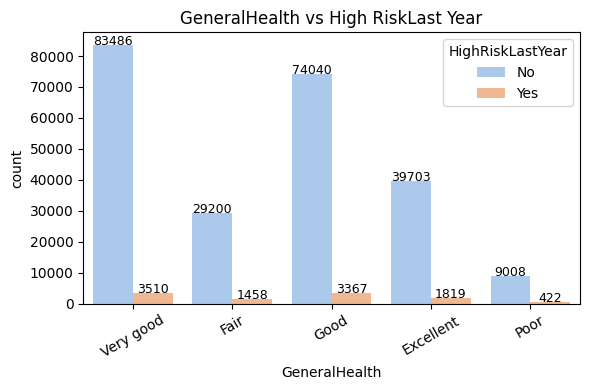

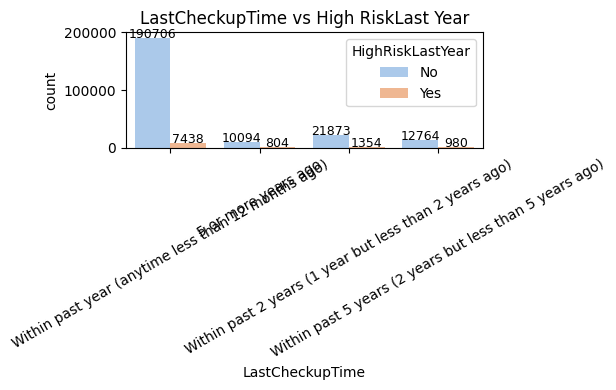

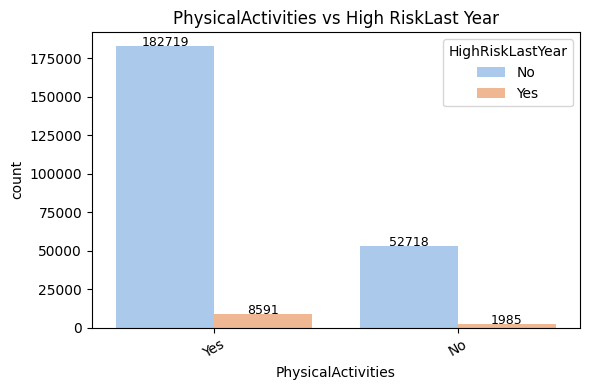

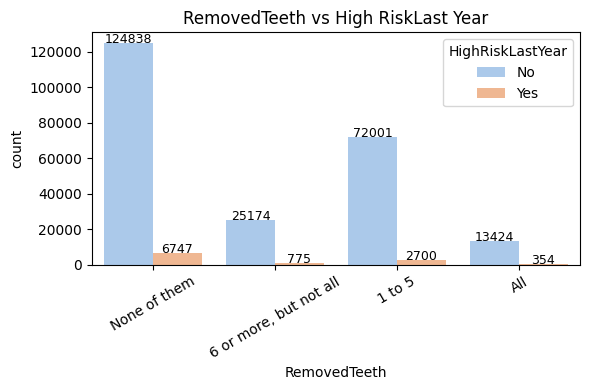

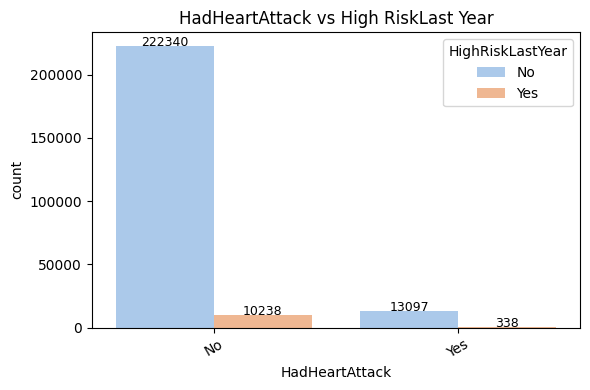

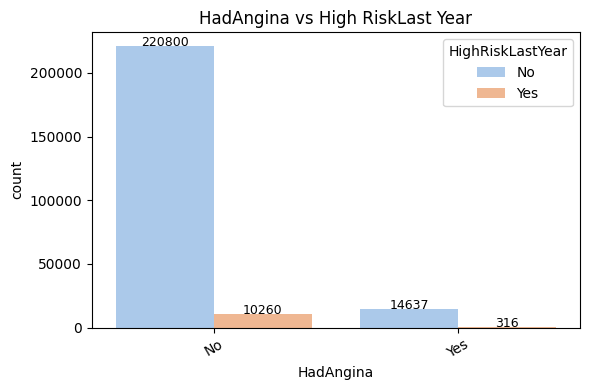

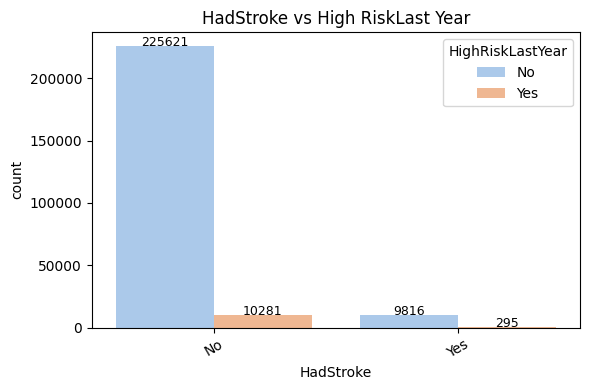

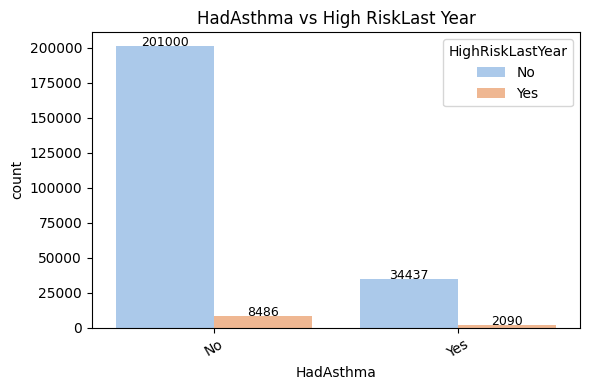

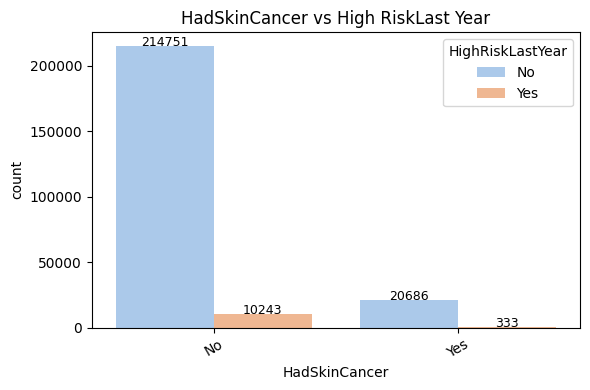

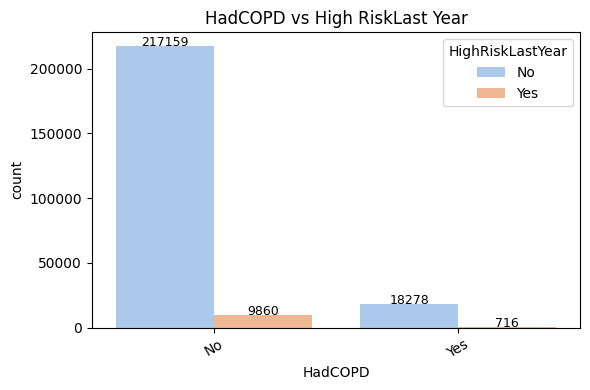

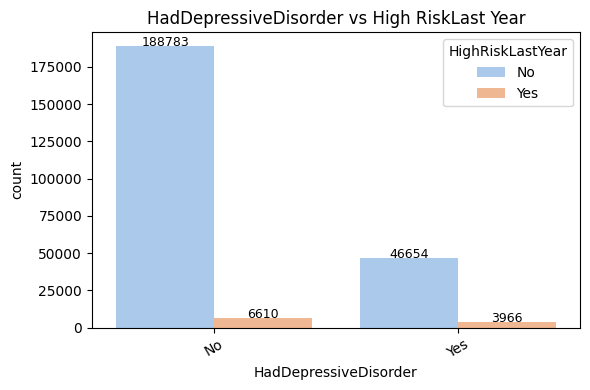

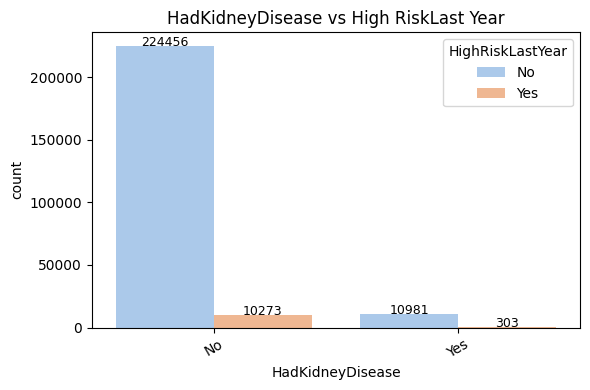

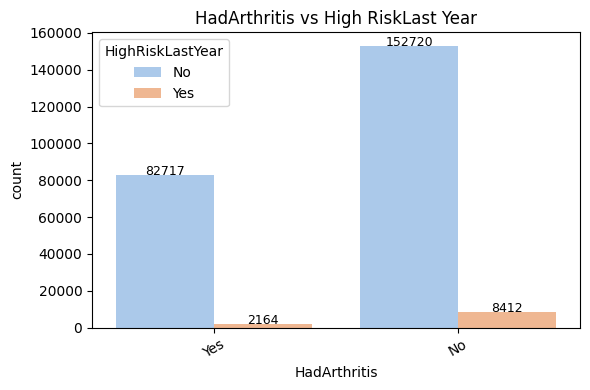

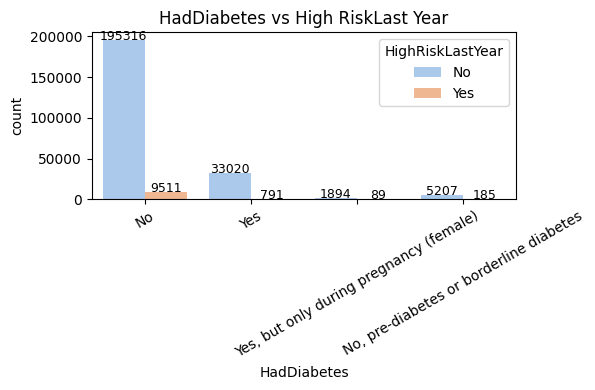

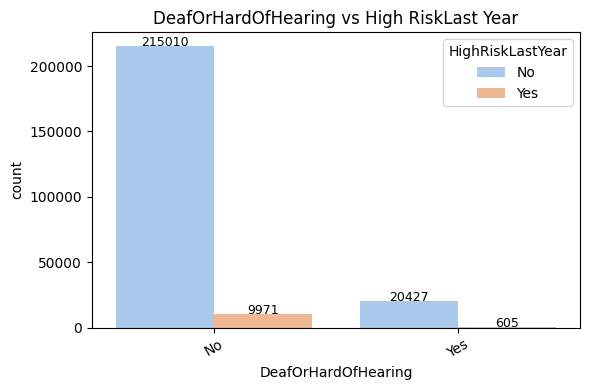

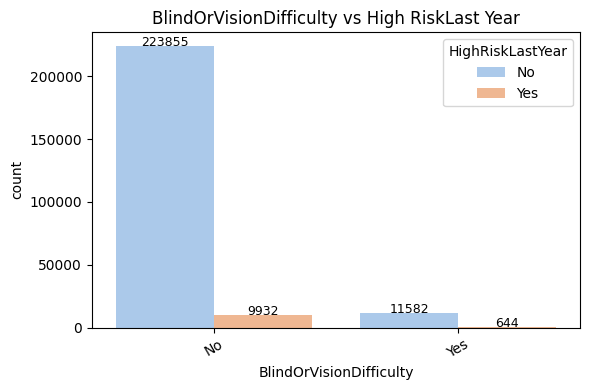

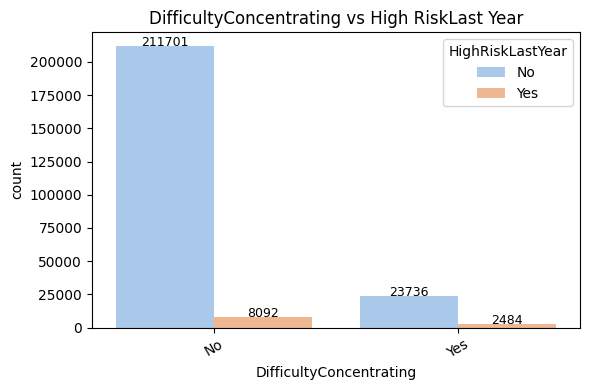

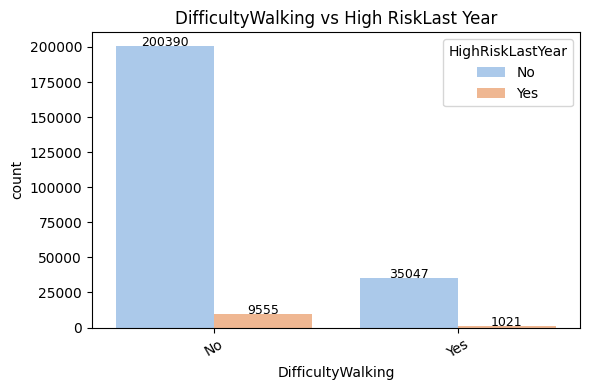

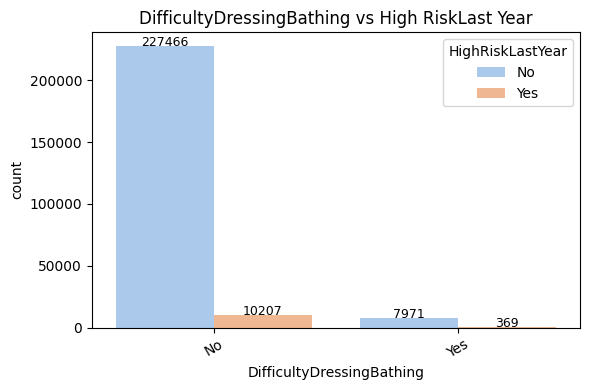

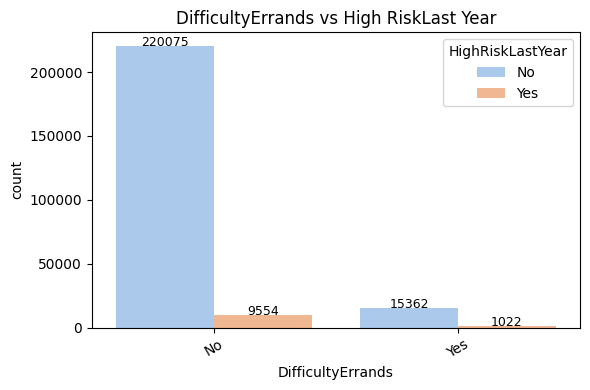

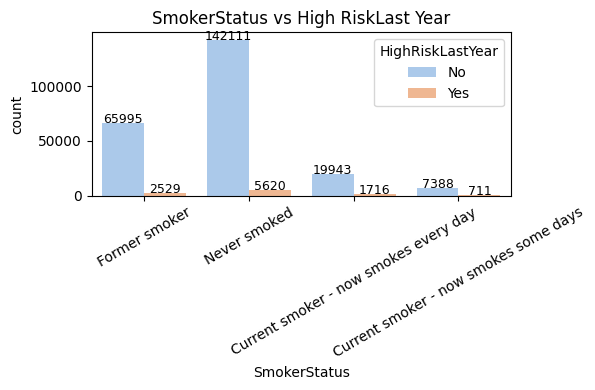

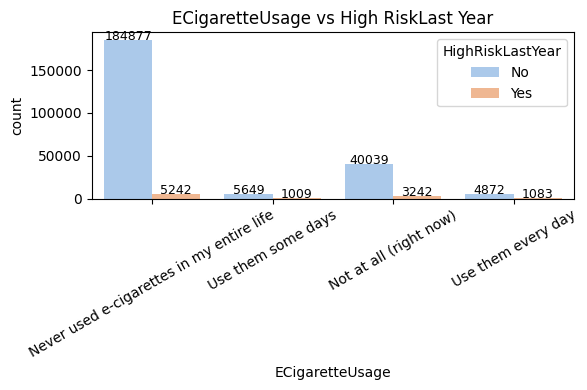

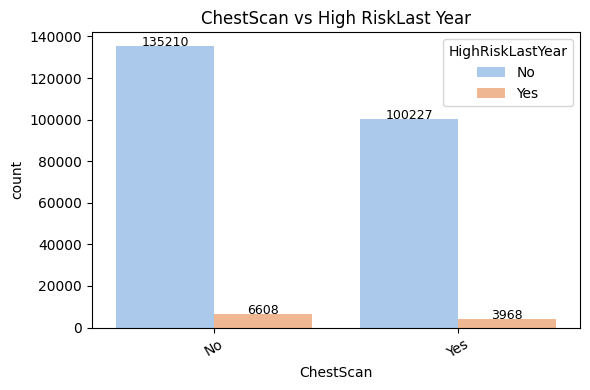

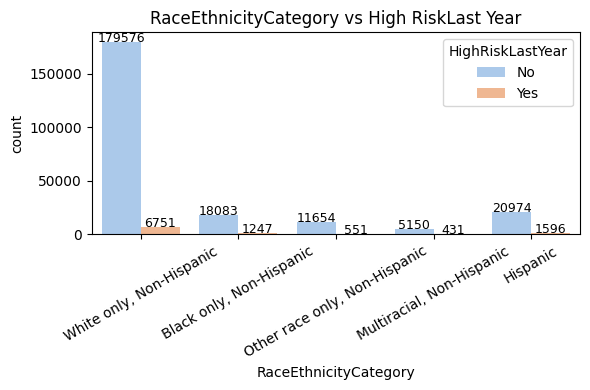

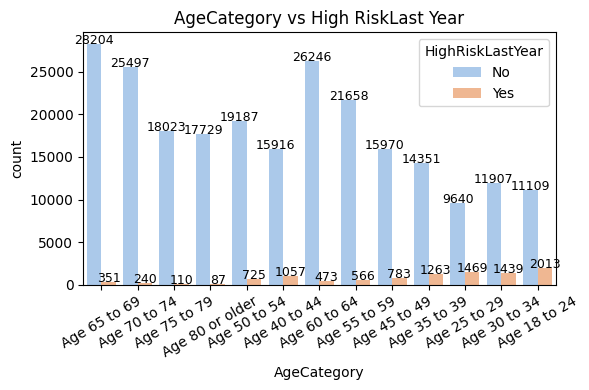

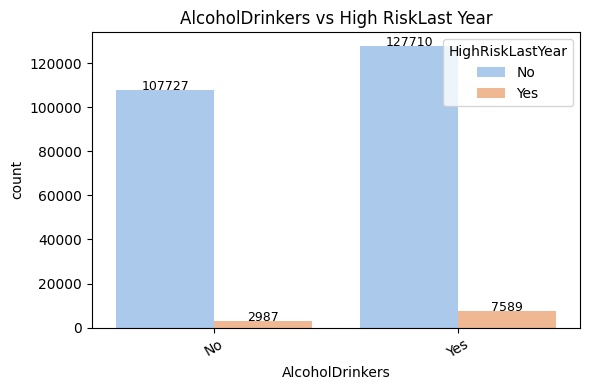

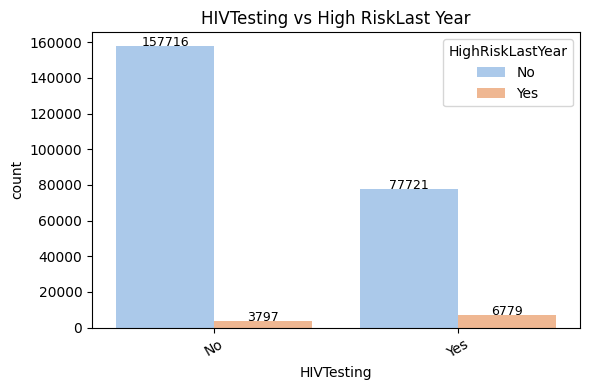

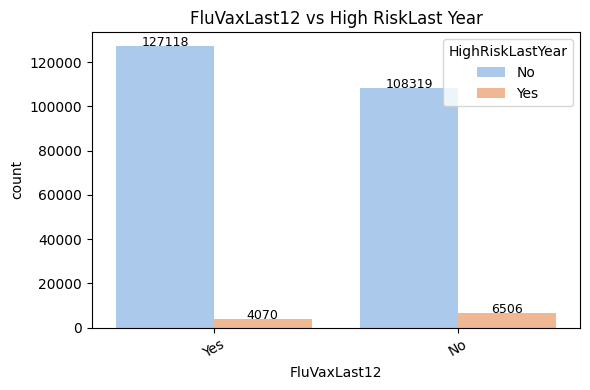

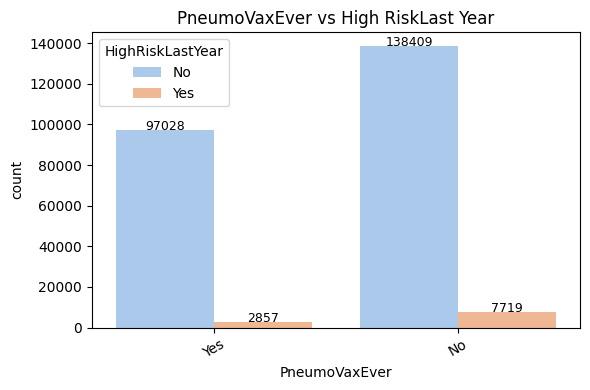

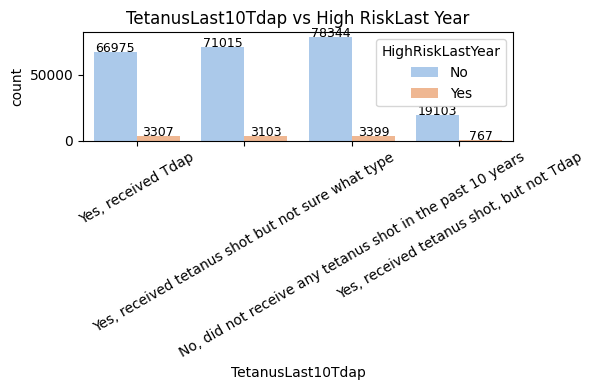

In [14]:
for col in kategorikal[:-1]:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, hue='HighRiskLastYear', data=data, palette='pastel')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), ha='center', fontsize=9)

    plt.title(f'{col} vs High RiskLast Year')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

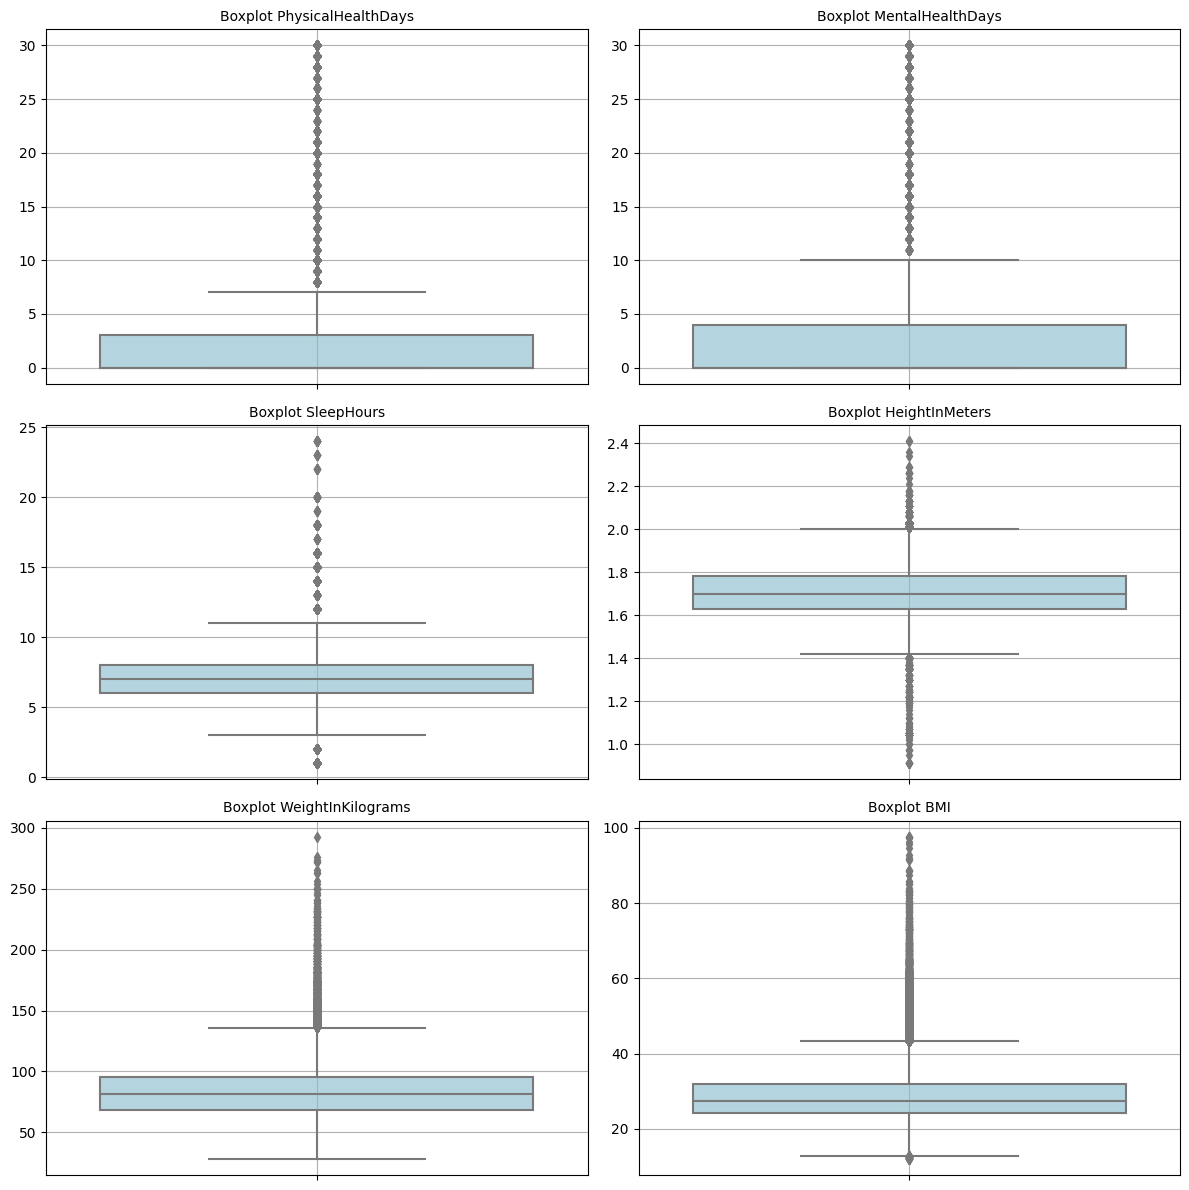

In [15]:
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns

n_cols = 2
n_rows = (len(kolom_numerik) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    sns.boxplot(y=data[kolom], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot {kolom}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


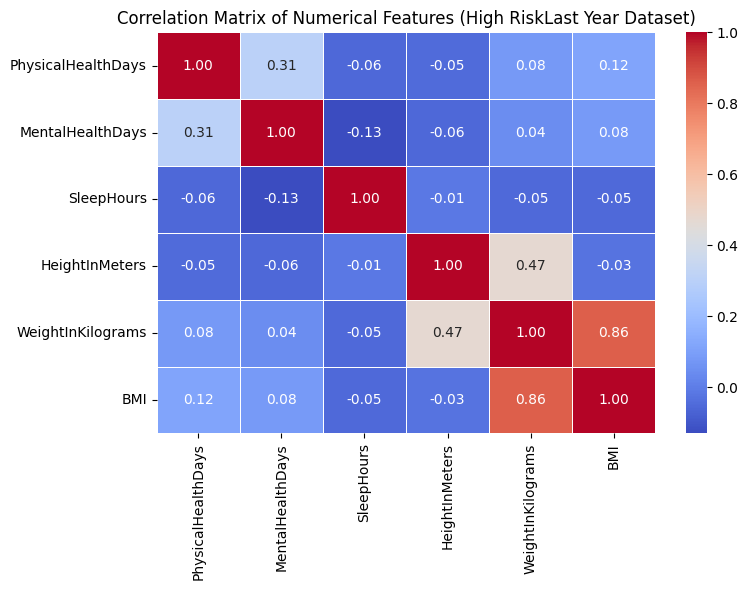

In [16]:
correlation_matrix = data[numerik].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (High RiskLast Year Dataset)', fontsize=12)
plt.tight_layout()
plt.show()

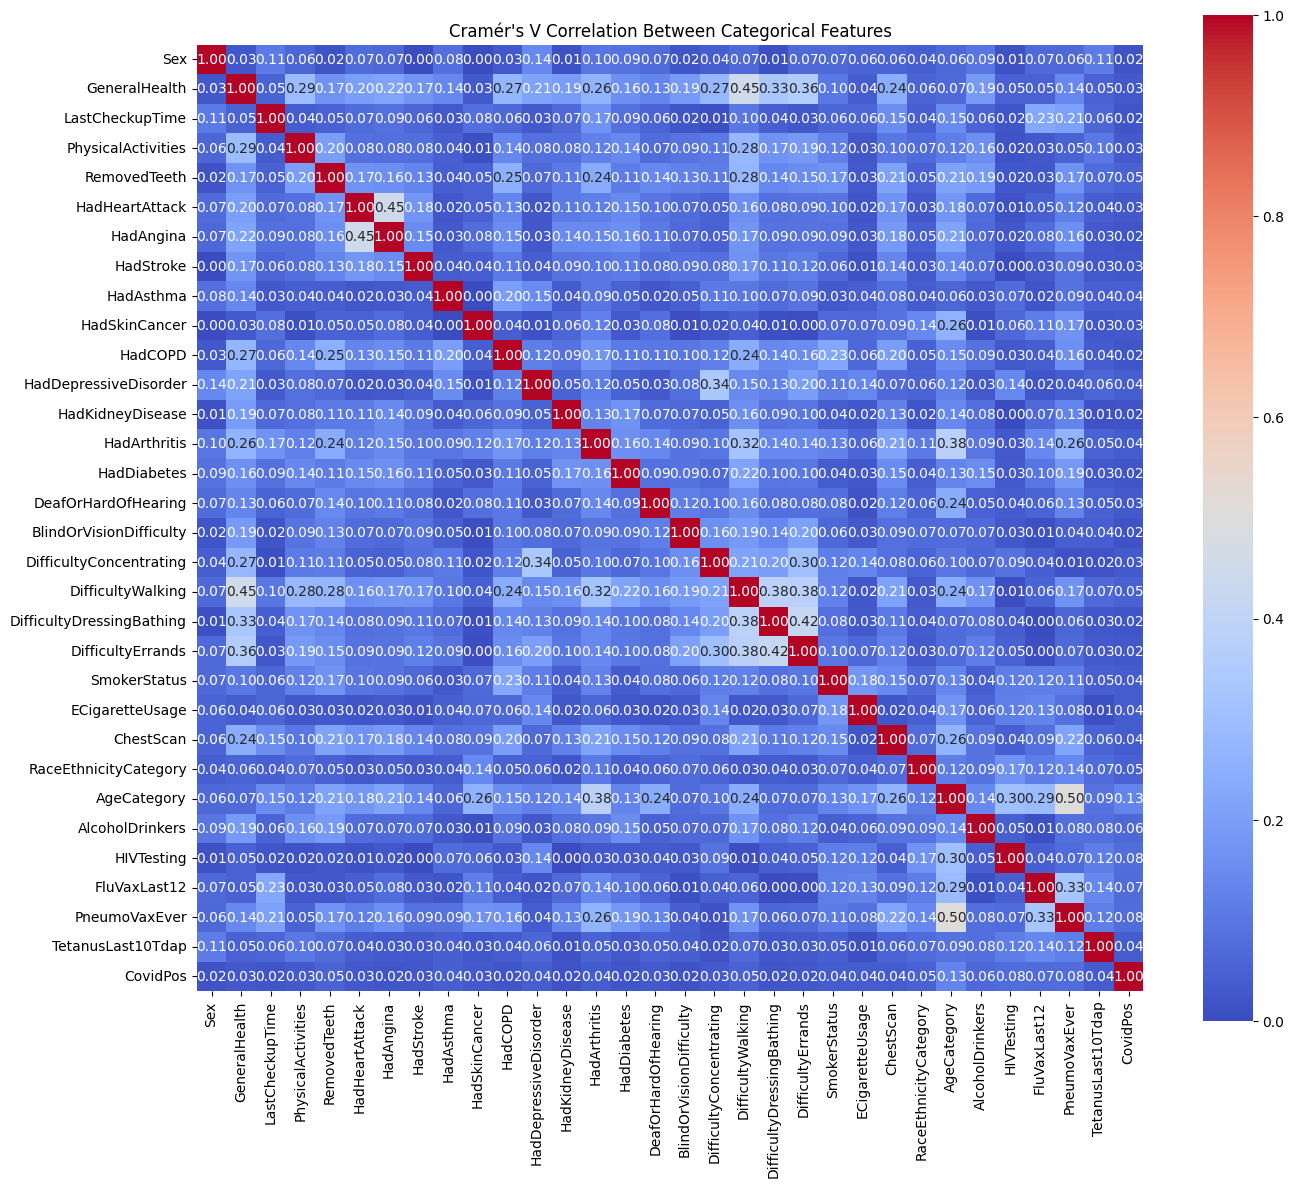

In [17]:
from scipy.stats import chi2_contingency

# Fungsi Cramér's V dengan bias correction
def cramers_v_corrected(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Koreksi bias
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2 / (n-1))
    kcorr = k - ((k-1)**2 / (n-1))
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_matrix = pd.DataFrame(np.zeros((len(kategorikal), len(kategorikal))),
                              index=kategorikal, columns=kategorikal)

for col1 in kategorikal:
    for col2 in kategorikal:
        try:
            cramers_matrix.loc[col1, col2] = cramers_v_corrected(data[col1], data[col2])
        except Exception as e:
            cramers_matrix.loc[col1, col2] = np.nan

# Visualisasi heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, mask=cramers_matrix.isnull())
plt.title("Cramér's V Correlation Between Categorical Features")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

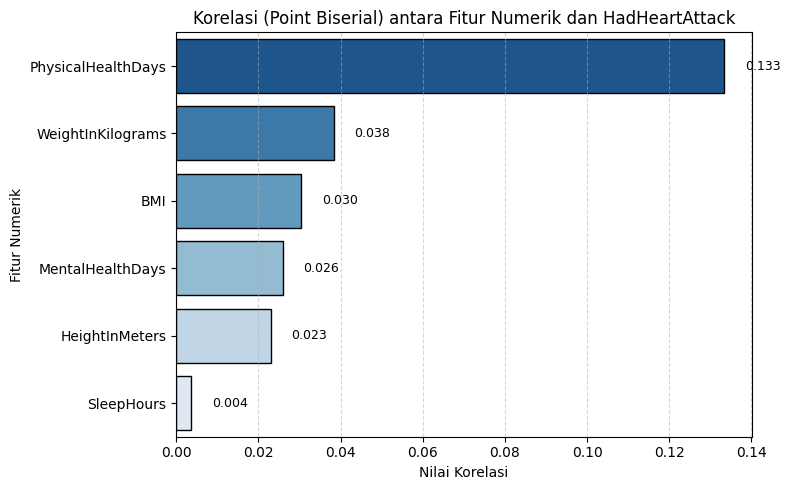

In [18]:
from scipy.stats import pointbiserialr

data = data.copy()
data['HadHeartAttack_bin'] = data['HadHeartAttack'].map({'Yes': 1, 'No': 0})

hasil_korelasi = {}
for col in numerik:
    corr, pval = pointbiserialr(data[col], data['HadHeartAttack_bin'])
    hasil_korelasi[col] = {
        'PointBiserial': corr,
        'p-value': pval
    }

# Konversi ke DataFrame
korelasi_df = pd.DataFrame(hasil_korelasi).T.sort_values(by='PointBiserial', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=korelasi_df.reset_index(),
    y='index',
    x='PointBiserial',
    palette='Blues_r',
    edgecolor='black'
)

for index, value in enumerate(korelasi_df['PointBiserial']):
    plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=9)

plt.title("Korelasi (Point Biserial) antara Fitur Numerik dan HadHeartAttack")
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur Numerik")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

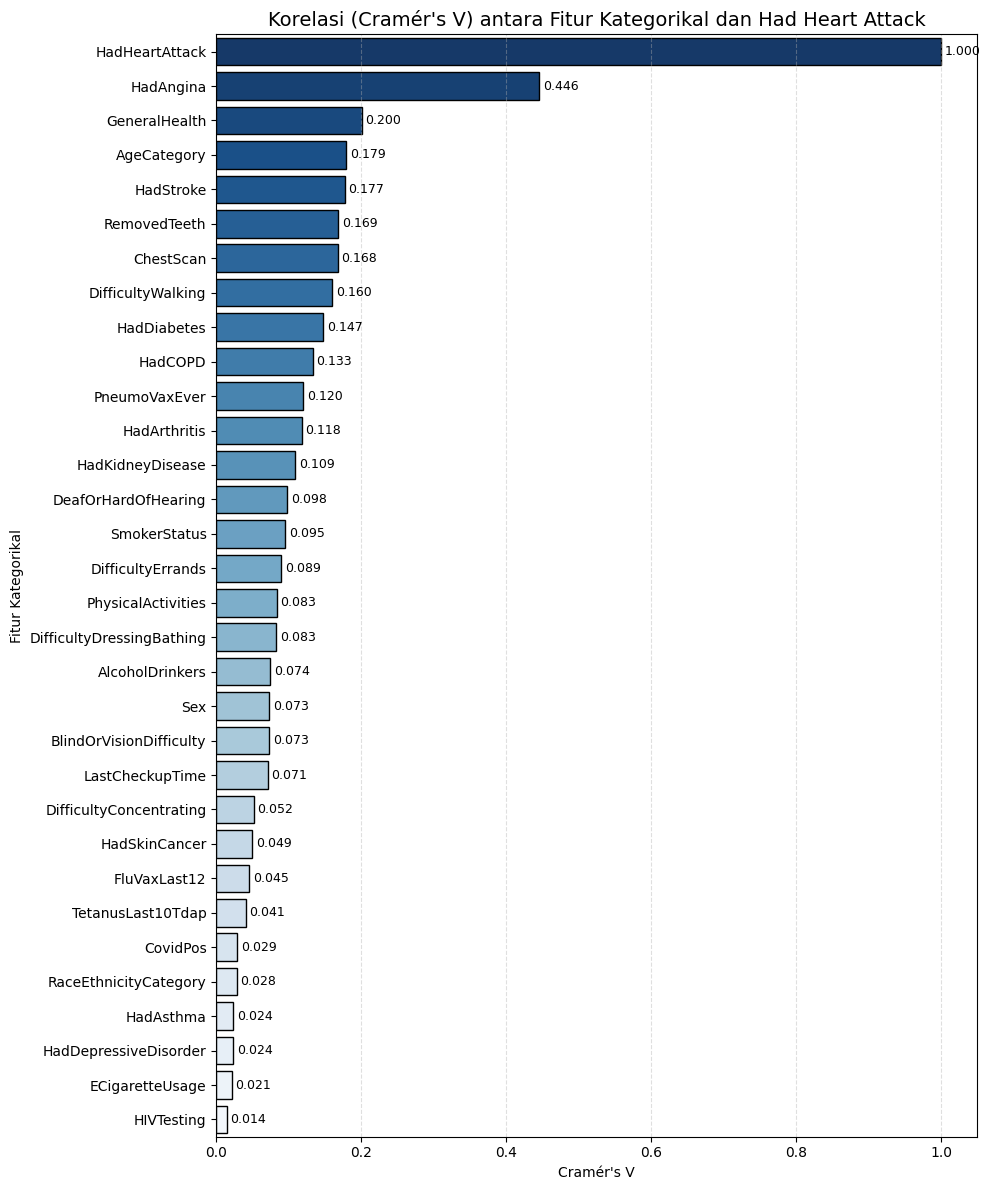

In [19]:
from scipy.stats import chi2_contingency

# Fungsi untuk menghitung Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

target = 'HadHeartAttack'
cramers_results = {}

for col in kategorikal:
    cramers_results[col] = cramers_v(data[col], data[target])

cramer_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values(by='CramersV', ascending=False)

cramer_plot_df = cramer_df.reset_index()
cramer_plot_df.columns = ['Fitur', 'CramersV']

plt.figure(figsize=(10, 12))
sns.barplot(
    data=cramer_plot_df,
    y='Fitur',
    x='CramersV',
    palette='Blues_r',
    edgecolor='black'
)

for index, value in enumerate(cramer_plot_df['CramersV']):
    plt.text(value + 0.005, index, f"{value:.3f}", va='center', fontsize=9)

plt.title("Korelasi (Cramér's V) antara Fitur Kategorikal dan Had Heart Attack", fontsize=14)
plt.xlabel("Cramér's V")
plt.ylabel("Fitur Kategorikal")
plt.xlim()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



# **Feature Selection**

# **Preprocessing Data**

In [20]:
data.drop(columns=['State'], inplace=True)
print('State' in data.columns)

False


In [21]:
print(data.duplicated().sum())
data = data.drop_duplicates()

27


In [22]:
print(data.columns.tolist())

['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack_bin']


## Data Encoding

In [23]:
# Binary Encoding
binary_cols = [
    'HadHeartAttack', 'HadStroke', 'DifficultyWalking', 'AlcoholDrinkers',
    'PhysicalActivities', 'HadAsthma', 'HadKidneyDisease', 'HadSkinCancer',
    'HadAngina', 'HadCOPD', 'HadDepressiveDisorder', 'DeafOrHardOfHearing',
    'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver','CovidPos'
]

for col in binary_cols:
    if col in data.columns:
        data.loc[:, col] = data[col].map({'Yes': 1, 'No': 0})

# Encoding kolom 'Sex'
if 'Sex' in data.columns:
    data.loc[:, 'Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})

# Ordinal Encoding
# Umur
age_order = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39',
    'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59',
    'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79',
    'Age 80 or older'
]
if 'AgeCategory' in data.columns:
    data.loc[:, 'AgeCategory'] = pd.Categorical(data['AgeCategory'], categories=age_order, ordered=True).codes

# Kesehatan umum
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
if 'GeneralHealth' in data.columns:
    data.loc[:, 'GeneralHealth'] = pd.Categorical(data['GeneralHealth'], categories=health_order, ordered=True).codes

# Pemeriksaan kesehatan terakhir
checkup_order = [
    '5 or more years ago',
    'Within past 5 years (2 years but less than 5 years ago)',
    'Within past 2 years (1 year but less than 2 years ago)',
    'Within past year (anytime less than 12 months ago)'
]
if 'LastCheckupTime' in data.columns:
    data.loc[:, 'LastCheckupTime'] = pd.Categorical(data['LastCheckupTime'], categories=checkup_order, ordered=True).codes

# Gigi tanggal
teeth_order = ['None of them', '1 to 5', '6 or more, but not all', 'All']
if 'RemovedTeeth' in data.columns:
    data.loc[:, 'RemovedTeeth'] = pd.Categorical(data['RemovedTeeth'], categories=teeth_order, ordered=True).codes

# Diabetes
diabetes_order = [
    'No',
    'No, pre-diabetes or borderline diabetes',
    'Yes, but only during pregnancy (female)',
    'Yes'
]
if 'HadDiabetes' in data.columns:
    data.loc[:, 'HadDiabetes'] = pd.Categorical(data['HadDiabetes'], categories=diabetes_order, ordered=True).codes

# One-Hot Encoding untuk kolom object yang tersisa
object_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=object_cols, drop_first=True)


## Normalisasi Fitur Numerik

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data.loc[:, numerik] = scaler.fit_transform(data[numerik])

print(data[numerik].head())

   PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0            0.133333               0.0    0.347826        0.460000   
1            0.000000               0.0    0.217391        0.580000   
2            0.000000               0.0    0.304348        0.626667   
3            0.166667               0.0    0.347826        0.526667   
4            0.100000               0.5    0.173913        0.426667   

   WeightInKilograms       BMI  
0           0.164681  0.186500  
1           0.253848  0.211491  
2           0.305313  0.229359  
3           0.236718  0.225388  
4           0.193836  0.245825  


In [25]:
data.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack_bin,Sex_1,GeneralHealth_1,GeneralHealth_2,...,AgeCategory_12,AlcoholDrinkers_1,HIVTesting_1,FluVaxLast12_1,PneumoVaxEver_1,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_1.0
0,0.133333,0.0,0.347826,0.460000,0.164681,0.186500,0,False,False,False,...,False,False,False,True,True,True,False,False,False,False
1,0.000000,0.0,0.217391,0.580000,0.253848,0.211491,0,True,False,False,...,False,False,False,True,True,False,True,False,False,False
2,0.000000,0.0,0.304348,0.626667,0.305313,0.229359,0,True,False,False,...,False,True,False,False,True,False,False,False,False,True
3,0.166667,0.0,0.347826,0.526667,0.236718,0.225388,0,False,True,False,...,True,False,False,True,True,False,False,False,False,True
4,0.100000,0.5,0.173913,0.426667,0.193836,0.245825,0,False,False,True,...,True,False,False,True,True,False,False,False,False,False


In [26]:
data = data.astype({col: 'int' for col in data.select_dtypes('bool').columns})
print("Dataframe after converting boolean columns:")
data

Dataframe after converting boolean columns:


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack_bin,Sex_1,GeneralHealth_1,GeneralHealth_2,...,AgeCategory_12,AlcoholDrinkers_1,HIVTesting_1,FluVaxLast12_1,PneumoVaxEver_1,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_1.0
0,0.133333,0.000000,0.347826,0.460000,0.164681,0.186500,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0.000000,0.000000,0.217391,0.580000,0.253848,0.211491,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.000000,0.000000,0.304348,0.626667,0.305313,0.229359,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0.166667,0.000000,0.347826,0.526667,0.236718,0.225388,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
4,0.100000,0.500000,0.173913,0.426667,0.193836,0.245825,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,0.000000,0.000000,0.217391,0.580000,0.279599,0.236599,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
246018,0.000000,0.233333,0.260870,0.680000,0.236718,0.143875,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
246019,0.000000,0.500000,0.260870,0.513333,0.210966,0.208338,0,1,0,1,...,0,1,1,1,1,0,1,0,0,1
246020,0.066667,0.066667,0.260870,0.526667,0.207563,0.194324,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [27]:
X = data.drop(columns=['HadHeartAttack_bin'])
y = data['HadHeartAttack_bin']

In [28]:
from sklearn.model_selection import train_test_split

# Split awal 80% (train+val) vs 20% (test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# train (87.5%) dan val (12.5%) dari 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,  # karena 0.125 * 0.8 = 0.10 dari total
    random_state=42,
    stratify=y_temp
)

In [29]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (172189, 68)
Validation: (24599, 68)
Test: (49198, 68)


In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Setelah SMOTE:")
print("Train:", X_train_bal.shape)
print("Distribusi label:", dict(zip(*np.unique(y_train_bal, return_counts=True))))

Setelah SMOTE:
Train: (325570, 68)
Distribusi label: {0: 162785, 1: 162785}


In [31]:
X_train_bal = X_train_bal.to_numpy().astype('float32')
X_val       = X_val.to_numpy().astype('float32')
X_test      = X_test.to_numpy().astype('float32')

y_train_bal = y_train_bal.to_numpy().astype('float32')
y_val       = y_val.to_numpy().astype('float32')
y_test      = y_test.to_numpy().astype('float32')

## Reshape untuk CNN 1D

In [32]:
# Reshape untuk CNN 1D
X_train_cnn = X_train_bal.reshape(X_train_bal.shape[0], X_train_bal.shape[1], 1)
X_val_cnn   = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (325570, 68, 1)
X_val_cnn: (24599, 68, 1)
X_test_cnn: (49198, 68, 1)


# **Model Development**

## D1 CNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

2025-07-17 09:38:06.191993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752745086.469379      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752745086.558381      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-17 09:38:23.406559: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 68, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 68, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 68, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 68, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 68, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 68, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       557,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,913 (2.22 MB)

 Trainable params: 582,529 (2.22 MB)

 Non-trainable params: 384 (1.50 KB)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback: berhenti jika val_loss tidak membaik
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Callback: simpan model terbaik berdasarkan val_loss
model_ckpt = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Training dengan callback
history = model.fit(
    X_train_cnn, y_train_bal,
    validation_data=(X_val_cnn, y_val),
    epochs=25,
    batch_size=128,
    callbacks=[early_stop, model_ckpt],
    verbose=1
)


Epoch 1/25
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9922 - auc: 0.9972 - loss: 0.0249
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.h5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 129s 49ms/step - accuracy: 0.9922 - auc: 0.9972 - loss: 0.0249 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 1.5514e-08
Epoch 2/25
2543/2544 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9998 - auc: 0.9999 - loss: 9.1589e-04
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to best_model.h5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.9998 - auc: 0.9999 - loss: 9.1566e-04 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 9.4311e-14
Epoch 3/25
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9998 - auc: 0.9999 - loss: 0.0013
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to best_model.h5
2544/2544 ━━━━━━━━━━━━━━━━━━━━ 126s 49ms/step - accuracy: 0.9998 - auc: 0.9999 - loss: 0.0013 - val_accuracy: 1.0000 - val_au

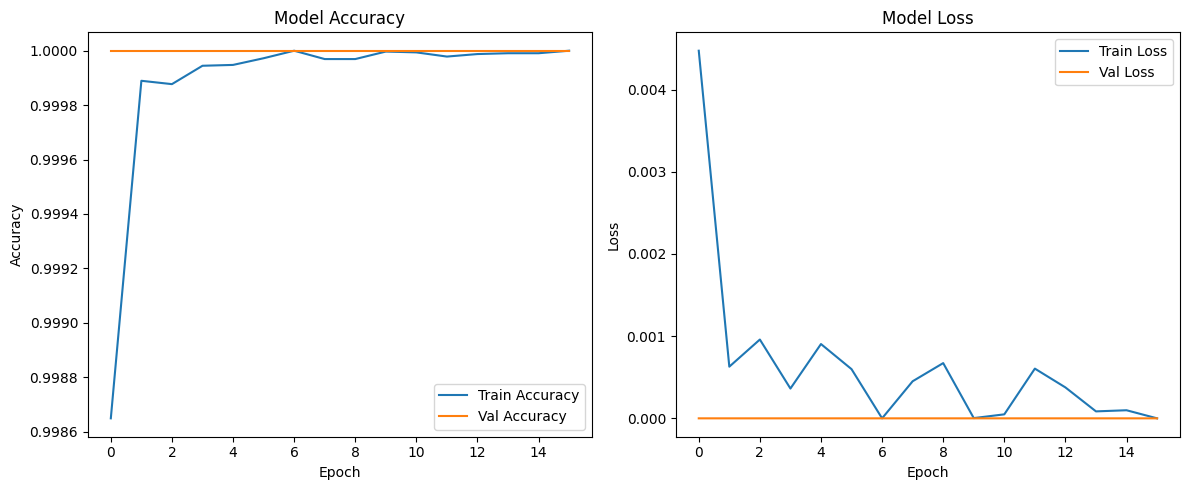

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
loss, accuracy, auc = model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

Test Accuracy: 1.0000
Test AUC: 1.0000


1538/1538 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step

Classification Report:
              precision    recall  f1-score   support

     No PCOS       1.00      1.00      1.00     46511
    Yes PCOS       1.00      1.00      1.00      2687

    accuracy                           1.00     49198
   macro avg       1.00      1.00      1.00     49198
weighted avg       1.00      1.00      1.00     49198



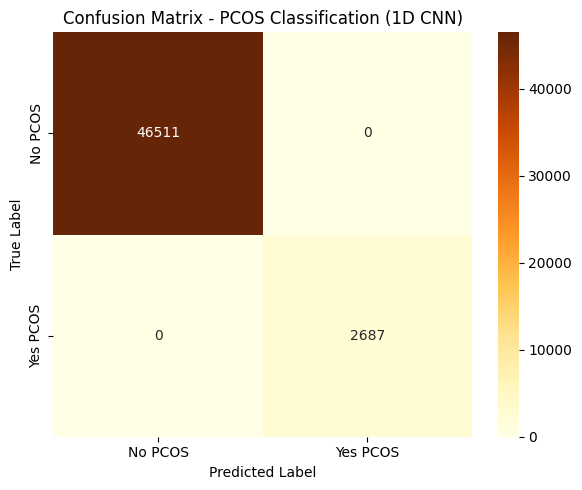

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(X_test_cnn)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
labels = ['No PCOS', 'Yes PCOS']

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - PCOS Classification (1D CNN)')
plt.tight_layout()
plt.show()


## XGBoost

In [38]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_bal, y_train_bal)

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("=== XGBoost ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== XGBoost ===
Confusion Matrix:
[[46511     0]
 [    0  2687]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46511
         1.0       1.00      1.00      1.00      2687

    accuracy                           1.00     49198
   macro avg       1.00      1.00      1.00     49198
weighted avg       1.00      1.00      1.00     49198



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

print("=== Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

=== Random Forest ===
Confusion Matrix:
[[46511     0]
 [    0  2687]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     46511
         1.0       1.00      1.00      1.00      2687

    accuracy                           1.00     49198
   macro avg       1.00      1.00      1.00     49198
weighted avg       1.00      1.00      1.00     49198



## TabNet

In [41]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [42]:
from pytorch_tabnet.tab_model import TabNetClassifier

y_train_bal = y_train_bal.astype('int')
y_val       = y_val.astype('int')

tabnet_model = TabNetClassifier(seed=42, verbose=1)

# Training
tabnet_model.fit(
    X_train=X_train_bal,
    y_train=y_train_bal,
    eval_set=[(X_val, y_val)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=30,
    patience=5,
    batch_size=256,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.01373 | val_accuracy: 1.0     |  0:00:42s
epoch 1  | loss: 0.00046 | val_accuracy: 1.0     |  0:01:25s
epoch 2  | loss: 0.0001  | val_accuracy: 1.0     |  0:02:06s
epoch 3  | loss: 7e-05   | val_accuracy: 1.0     |  0:02:48s
epoch 4  | loss: 5e-05   | val_accuracy: 1.0     |  0:03:30s
epoch 5  | loss: 4e-05   | val_accuracy: 1.0     |  0:04:10s

Early stopping occurred at epoch 5 with best_epoch = 0 and best_val_accuracy = 1.0


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Pastikan X_test dan y_test sudah dalam format NumPy (kalau belum)
X_test_np = X_test.astype('float32')  # Jika belum float32
y_test_np = y_test.astype('int')      # Jika belum int

# Prediksi probabilitas dan kelas
y_pred_prob = tabnet_model.predict_proba(X_test_np)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluasi hasil
print("=== TabNet Evaluation ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))

print("AUC Score:", roc_auc_score(y_test_np, y_pred_prob))


=== TabNet Evaluation ===
Confusion Matrix:
[[46511     0]
 [    0  2687]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46511
           1       1.00      1.00      1.00      2687

    accuracy                           1.00     49198
   macro avg       1.00      1.00      1.00     49198
weighted avg       1.00      1.00      1.00     49198

AUC Score: 1.0


# **Analisis Hasil**

**Perbandingan Model Klasifikasi untuk Deteksi PCOS**

| Model           | Accuracy | Precision (Yes PCOS) | Recall (Yes PCOS) | F1-score (Yes PCOS) | TP   | FN   | FP   | TN    |
|-----------------|----------|----------------------|--------------------|----------------------|------|------|------|-------|
| **1D CNN**      | 0.58     | 0.11                 | 0.41               | 0.17                 | 1034 | 1485 | 8646 | 12835 |
| **XGBoost**     | 0.89     | 0.00                 | 0.00               | 0.00                 | 0    | 2519 | 3    | 21478 |
| **Random Forest** | 0.84   | 0.10                 | 0.06               | 0.07                 | 144  | 2375 | 1357 | 20124 |
| **TabNet**      | 0.58     | 0.11                 | 0.41               | 0.17                 | 1025 | 1494 | 8571 | 12910 |

**Analisis**
- Model XGBoost dan Random Forest memang menghasilkan akurasi tinggi (masing-masing 89% dan 84%). Namun, keduanya sangat bias terhadap kelas mayoritas (No PCOS). Ini terlihat dari recall yang sangat rendah untuk kasus Yes PCOS (0–6%), sehingga banyak kasus penting tidak terdeteksi.

- Sebaliknya, model TabNet dan 1D CNN memang memiliki akurasi yang lebih rendah (sekitar 58%), tetapi mampu mengenali lebih banyak kasus PCOS (recall 41%). Ini menjadikannya lebih cocok untuk tujuan skrining atau deteksi dini, di mana mendeteksi kasus positif (Yes PCOS) jauh lebih penting daripada hanya mengejar akurasi keseluruhan.